44.496467435111214 fastball speed
240.62206941583676 fastball spin
37.69678906644245 curveball speed
276.0794556333265 curveball spin


<IPython.core.display.Javascript object>


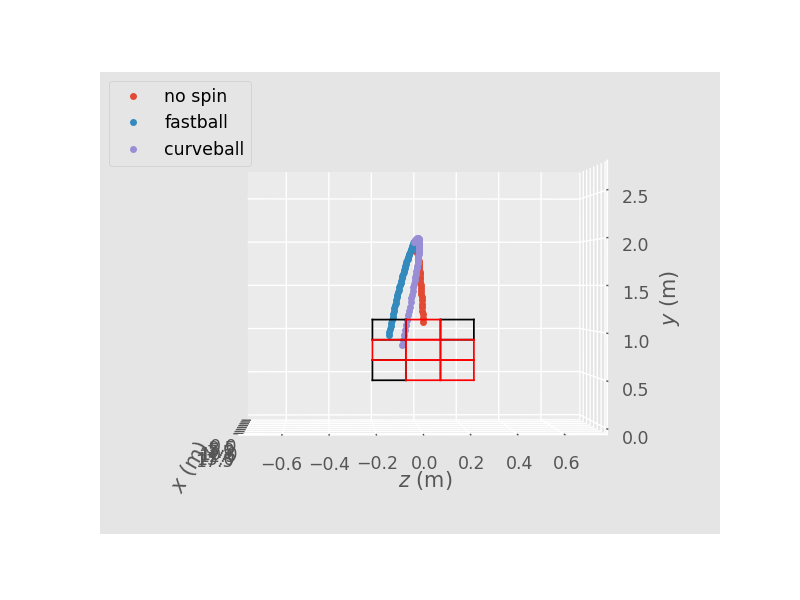

(0, 2.75)

In [1]:
import numpy as np
import ode
import random as rn
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def C_L(S):
    return 0.62 * S**0.7

def simulate_baseball(v0, omega, r0=None,
                      h=0.01, C_D=0.40, g=9.81, rho=0.97,
                      r=0.07468/2, m=0.14883,
                      R_homeplate=18.4):

   
    if r0 is None:
        r0 = np.array([0, 2]) 
    
    a_gravity = np.array([0, -g, 0])

    def f(t, y):
        v = y[3:]
        dv = np.linalg.norm(v)
        A = np.pi*r**2
        rhoArm = rho * A * r / m
        def C_D(dv):
            return 0.36 + 0.14/(1+np.exp(.25*(dv-34)))-0.27*np.exp(-1*(.25*(dv-34))**2/4)
        b2 = 0.5 * C_D(dv) * rho * A
        def tomega(t):
            return np.exp(-t/5)*np.asarray(omega)
        domega = np.linalg.norm(tomega(t))
        S = r*domega/dv
        a_magnus = 0.5 * C_L(S) * rhoArm / S * np.cross(tomega(t), v)
        a_drag = -b2/m * dv * v
        a = a_gravity + a_drag + a_magnus
        return np.array([y[3], y[4], y[5],
                         a[0], a[1], a[2]])

    x0, y0 = r0
    vx, vy, vz = v0
    t = 0
    positions = []
    
    y = np.array([x0, y0, 0, vx, vy, vz], dtype=np.float64)
    
    while y[0] < R_homeplate and y[1] >= 0.2:
        positions.append([t, y[0], y[1], y[2]])  # record t, x and y, z
        y[:] = ode.rk4(y, f, t, h)
        t += h
        
    return np.array(positions)

A = rn.uniform(40.75,44.52)
B = rn.uniform(272,293)
C = rn.uniform(35.088,39.34)
D = rn.uniform(236,257)
NoSpin = simulate_baseball([A, 0, 0], omega=0.001*np.array([0,0,1]))
Fast = simulate_baseball([A, -A*np.tan(0.03596), -A*np.tan(0.00812)], omega=D*np.array([0,0,1]))
Curve = simulate_baseball([C, C*np.tan(0.02621), C*np.tan(0.005405)], omega=B*np.array([0,.3,-.7]))
print(A, "fastball speed")
print(D, "fastball spin")
print(C, "curveball speed")
print(B, "curveball spin")

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(NoSpin[:,1], NoSpin[:,3], NoSpin[:,2], '.', label="no spin")
ax.plot(Fast[:,1], Fast[:,3], Fast[:,2], '.', label="fastball")
ax.plot(Curve[:,1], Curve[:,3], Curve[:,2], '.', label="curveball")

# zones
ax.plot([18.4, 18.4], [-.07366, -.2159], [.508, .508], color="black", lw=1)
ax.plot([18.4, 18.4], [-.07366, -.2159], [.71882, .71882], color="black", lw=1)
ax.plot([18.4, 18.4], [-.07366, -.07366], [.508, .71882], color="black", lw=1)
ax.plot([18.4, 18.4], [-.21596, -.2159], [.508, .71882], color="black", lw=1)

ax.plot([18.4, 18.4], [-.07366, -.2159], [.93218, .93218], color="black", lw=1)
ax.plot([18.4, 18.4], [-.07366, -.2159], [1.143, 1.143], color="black", lw=1)
ax.plot([18.4, 18.4], [-.07366, -.07366], [.93218, 1.143], color="black", lw=1)
ax.plot([18.4, 18.4], [-.21596, -.2159], [.93218, 1.143], color="black", lw=1)

ax.plot([18.4, 18.4], [-.07366, -.2159], [.71882, .71882], color="red", lw=1)
ax.plot([18.4, 18.4], [-.07366, -.2159], [.93218, .93218], color="red", lw=1)
ax.plot([18.4, 18.4], [-.07366, -.07366], [.71882, .93218], color="red", lw=1)
ax.plot([18.4, 18.4], [-.21596, -.2159], [.71882, .93218], color="red", lw=1)



ax.plot([18.4, 18.4], [.07366, .2159], [.508, .508], color="red", lw=1)
ax.plot([18.4, 18.4], [.07366, .2159], [.71882, .71882], color="red", lw=1)
ax.plot([18.4, 18.4], [.07366, .07366], [.508, .71882], color="red", lw=1)
ax.plot([18.4, 18.4], [.21596, .2159], [.508, .71882], color="red", lw=1)

ax.plot([18.4, 18.4], [.07366, .2159], [.93218, .93218], color="black", lw=1)
ax.plot([18.4, 18.4], [.07366, .2159], [1.143, 1.143], color="black", lw=1)
ax.plot([18.4, 18.4], [.07366, .07366], [.93218, 1.143], color="black", lw=1)
ax.plot([18.4, 18.4], [.21596, .2159], [.93218, 1.143], color="black", lw=1)

ax.plot([18.4, 18.4], [.07366, .2159], [.71882, .71882], color="red", lw=1)
ax.plot([18.4, 18.4], [.07366, .2159], [.93218, .93218], color="red", lw=1)
ax.plot([18.4, 18.4], [.07366, .07366], [.71882, .93218], color="red", lw=1)
ax.plot([18.4, 18.4], [.21596, .2159], [.71882, .93218], color="red", lw=1)

ax.plot([18.4, 18.4], [.07366, -.07366], [.71882, .71882], color="red", lw=1)
ax.plot([18.4, 18.4], [.07366, -.07366], [.93218, .93218], color="red", lw=1)
ax.plot([18.4, 18.4], [.07366, .07366], [.71882, .93218], color="red", lw=1)
ax.plot([18.4, 18.4], [-.07366, -.07366], [.71882, .93218], color="red", lw=1)

ax.plot([18.4, 18.4], [.07366, -.07366], [.93218, .93218], color="red", lw=1)
ax.plot([18.4, 18.4], [.07366, -.07366], [1.143, 1.143], color="red", lw=1)
ax.plot([18.4, 18.4], [.07366, .07366], [.93218, 1.143], color="red", lw=1)
ax.plot([18.4, 18.4], [-.07366, -.07366], [.93218, 1.143], color="red", lw=1)

ax.plot([18.4, 18.4], [.07366, -.07366], [.508, .508], color="red", lw=1)
ax.plot([18.4, 18.4], [.07366, -.07366], [.71882, .71882], color="red", lw=1)
ax.plot([18.4, 18.4], [.07366, .07366], [.508, .71882], color="red", lw=1)
ax.plot([18.4, 18.4], [-.07366, -.07366], [.508, .71882], color="red", lw=1)

ax.set_xlabel("$x$ (m)")
ax.set_ylabel("$z$ (m)")
ax.set_zlabel("$y$ (m)")
ax.legend(loc="upper left", numpoints=1)
ax.set_xlim3d(0,18.5)
ax.set_ylim3d(-.75,.75)
ax.set_zlim3d(0,2.75)


